In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats

In [ ]:
df_2024 = pd.read_csv("../data/play_by_play_2024.csv", low_memory=False)
df_2023 = pd.read_csv("../data/play_by_play_2023.csv", low_memory=False)

# Get the teams in the NFL
teams = df_2024['posteam'].dropna().unique()

In [112]:
df_2023.shape

(49665, 374)

In [8]:
# Team records ~ 2024
record_2024 = {}

# Iterate through teams
for team in teams:
    record_2024[team] = [0, 0, 0] # [win, loss, tie]

    weeks_played = df_2024[df_2024['posteam'] == team].week.unique()

    for week in weeks_played:
        # Check if team is home or away team and get the scores of both
        home_team = df_2024[(df_2024['posteam'] == team) & (df_2024['week'] == week)]['home_team'].unique()
        away_team = df_2024[(df_2024['posteam'] == team) & (df_2024['week'] == week)]['away_team'].unique()
        home_score = df_2024[(df_2024['posteam'] == team) & (df_2024['week'] == week)]['home_score'].unique()
        away_score = df_2024[(df_2024['posteam'] == team) & (df_2024['week'] == week)]['away_score'].unique()

        if (home_team == team and home_score > away_score) or (away_team == team and away_score > home_score):
            record_2024[team][0] += 1 # Win
        elif (home_team == team and home_score < away_score) or (away_team == team and home_score > away_score):
            record_2024[team][1] += 1 # Loss
        else:
            record_2024[team][2] += 1 # Tie

In [9]:
# Team records ~ 2023
record_2023 = {}

# Iterate through teams
for team in teams:
    record_2023[team] = [0, 0, 0] # [win, loss, tie]

    weeks_played = df_2023[df_2023['posteam'] == team].week.unique()
    
    for week in weeks_played:
        # Check if team is home or away team and get the scores of both
        home_team = df_2023[(df_2023['posteam'] == team) & (df_2023['week'] == week)]['home_team'].unique()
        away_team = df_2023[(df_2023['posteam'] == team) & (df_2023['week'] == week)]['away_team'].unique()
        home_score = df_2023[(df_2023['posteam'] == team) & (df_2023['week'] == week)]['home_score'].unique()
        away_score = df_2023[(df_2023['posteam'] == team) & (df_2023['week'] == week)]['away_score'].unique()

        if (home_team == team and home_score > away_score) or (away_team == team and away_score > home_score):
            record_2023[team][0] += 1 # Win
        elif (home_team == team and home_score < away_score) or (away_team == team and home_score > away_score):
            record_2023[team][1] += 1 # Loss
        else:
            record_2023[team][2] += 1 # Tie

In [5]:
# Early down eff (1st down > 3 second down > 50%) ~ 2024

# We only care about pass or run plays no special team plays
valid_plays = ['pass', 'run'] 

team_early_down_2024 = {}

# Create dict structure for each team
for team in teams:
    team_early_down_2024[team] = [0, 0, 0, 0] # [1st down eff plays, 2nd down eff plays, tot 1, tot 2]

for team in teams:
    team_df = df_2024[df_2024['posteam'] == team]

    for _, play in team_df.iterrows():
        # Check if it is a valid play 
        if play['play_type'] in valid_plays:
            if play['down'] == 1:
                team_early_down_2024[team][2] += 1
                if play['yards_gained'] >= 3:
                    team_early_down_2024[team][0] += 1
            if play['down'] == 2:
                team_early_down_2024[team][3] += 1

                # Calculate 50% of the yards to gain
                togo = play['ydstogo']
                half_togo = togo/2 
                
                if play['yards_gained'] > half_togo:
                    team_early_down_2024[team][1] += 1

team_early_down_efficiency_2024 = {}

# Convert these metrics to efficiency percentages
for team in teams:
    team_early_down_efficiency_2024[team] = [
        (team_early_down_2024[team][0]/team_early_down_2024[team][2]) * 100, 
        (team_early_down_2024[team][1]/team_early_down_2024[team][3]) * 100, 
        ((team_early_down_2024[team][0] + team_early_down_2024[team][1]) / (team_early_down_2024[team][2] + team_early_down_2024[team][3])) * 100] # [1st down eff, 2nd down eff, early down(1st & 2nd)]

print(team_early_down_efficiency_2024)


{'ARI': [62.22910216718266, 56.30252100840336, 59.71479500891266], 'BUF': [55.80645161290323, 55.74468085106383, 55.779816513761475], 'BAL': [63.61185983827493, 52.47148288973384, 58.99053627760252], 'KC': [62.5, 51.698113207547166, 57.73710482529118], 'NO': [60.12861736334405, 47.03557312252965, 54.25531914893617], 'CAR': [57.52508361204013, 43.75, 51.625239005736134], 'DAL': [56.4179104477612, 48.46153846153846, 52.94117647058824], 'CLE': [52.293577981651374, 43.18181818181818, 48.223350253807105], 'SEA': [54.0785498489426, 49.79253112033195, 52.27272727272727], 'DEN': [58.507462686567166, 45.0, 52.60504201680673], 'GB': [59.02578796561605, 55.39033457249071, 57.44336569579288], 'PHI': [60.36036036036037, 48.38709677419355, 55.24956970740104], 'IND': [55.15151515151515, 41.702127659574465, 49.557522123893804], 'HOU': [50.82872928176796, 41.81818181818181, 46.93877551020408], 'MIA': [57.3134328358209, 48.178137651821864, 53.43642611683849], 'JAX': [56.271186440677965, 49.0740740740740

In [6]:
# Early down eff (1st down > 3 second down > 50%) ~ 2023

# We only care about pass or run plays no special team plays
valid_plays = ['pass', 'run'] 

team_early_down_2023 = {}

# Create dict structure for each team
for team in teams:
    team_early_down_2023[team] = [0, 0, 0, 0] # 1st down eff plays, 2nd down eff plays, tot 1, tot 2

for team in teams:
    team_df = df_2023[df_2023['posteam'] == team]

    for _, play in team_df.iterrows():
        # Check if it is a valid play 
        if play['play_type'] in valid_plays:
            if play['down'] == 1:
                team_early_down_2023[team][2] += 1
                if play['yards_gained'] >= 3:
                    team_early_down_2023[team][0] += 1
            if play['down'] == 2:
                team_early_down_2023[team][3] += 1

                # Calculate 50% of the yards to gain
                togo = play['ydstogo']
                half_togo = togo/2 
                
                if play['yards_gained'] > half_togo:
                    team_early_down_2023[team][1] += 1

team_early_down_efficiency_2023 = {}

# Convert these metrics to efficiency percentages
for team in teams:
    team_early_down_efficiency_2023[team] = [
        (team_early_down_2023[team][0]/team_early_down_2023[team][2]) * 100, 
        (team_early_down_2023[team][1]/team_early_down_2023[team][3]) * 100, 
        ((team_early_down_2023[team][0] + team_early_down_2023[team][1]) / (team_early_down_2023[team][2] + team_early_down_2023[team][3])) * 100] # [1st down eff, 2nd down eff, early down(1st & 2nd)]


print(team_early_down_efficiency_2023)


{'ARI': [52.49457700650759, 44.57478005865102, 49.12718204488778], 'BUF': [64.36363636363637, 56.904761904761905, 61.134020618556704], 'BAL': [62.05607476635514, 53.960396039603964, 58.57294994675186], 'KC': [56.92567567567568, 53.2258064516129, 55.36062378167641], 'NO': [58.26271186440678, 50.534759358288774, 54.84633569739953], 'CAR': [55.63063063063063, 39.42857142857143, 48.48866498740554], 'DAL': [61.48007590132827, 50.12658227848101, 56.61605206073753], 'CLE': [54.054054054054056, 45.26066350710901, 50.10638297872341], 'SEA': [59.95475113122172, 48.89589905362776, 55.33596837944664], 'DEN': [57.540603248259856, 46.93251533742331, 52.97225891677675], 'GB': [61.08870967741935, 50.91383812010444, 56.655290102389074], 'PHI': [55.55555555555556, 52.35602094240838, 54.18994413407822], 'IND': [54.347826086956516, 50.13927576601671, 52.50305250305251], 'HOU': [57.28542914171657, 45.99483204134367, 52.36486486486487], 'MIA': [62.4, 50.28409090909091, 57.3943661971831], 'JAX': [55.88235294

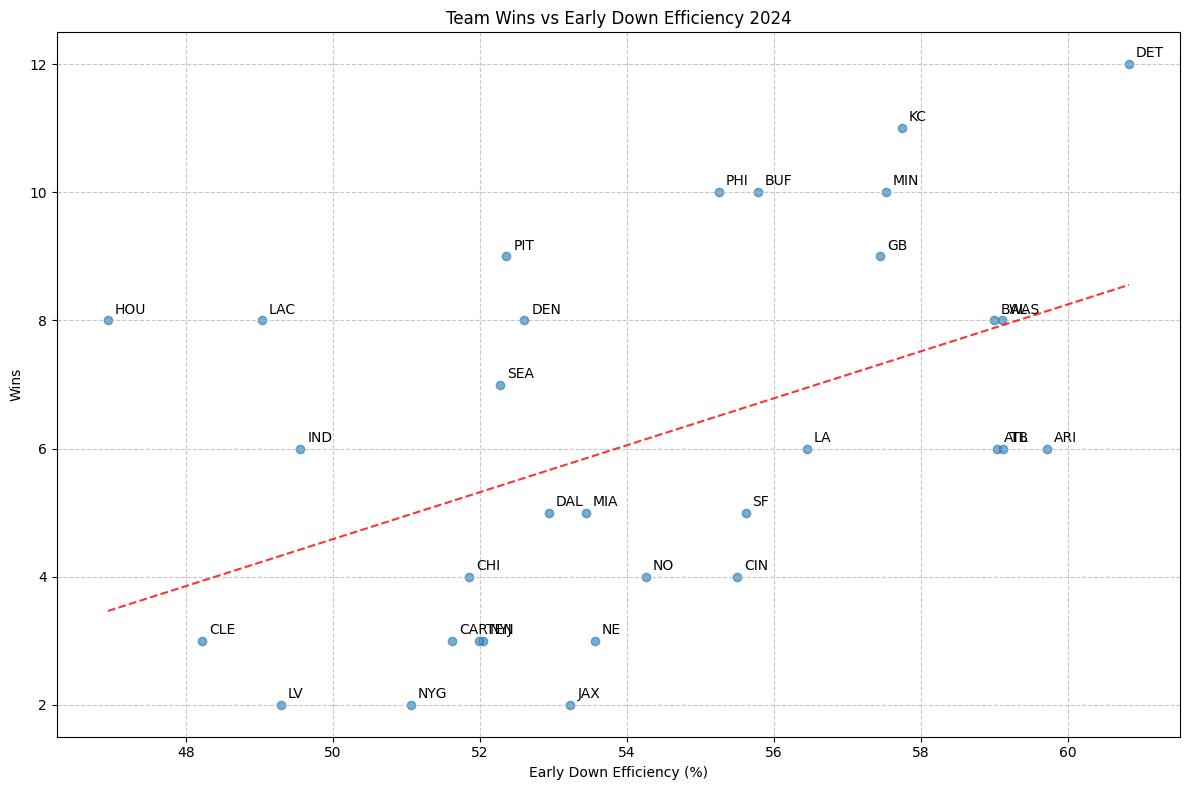

0.22131619638236938


In [ ]:
# 2024 team eff

team_eff = []
team_wins = []
team_label = []

for team in teams:
    team_eff.append(team_early_down_efficiency_2024[team][2])
    team_wins.append(record_2024[team][0])
    team_label.append(team)

# Calculate correlation and trend line for chart
correlation_matrix = np.corrcoef(team_eff, team_wins)
correlation = correlation_matrix[0,1]
r_squared = correlation ** 2

slope, intercept = np.polyfit(team_eff, team_wins, 1)

plt.figure(figsize = (12, 8))
plt.scatter(team_eff, team_wins, alpha = 0.6)

for i, team in enumerate(team_label):
    plt.annotate(team, (team_eff[i], team_wins[i]), xytext=(5, 5), textcoords='offset points')

x_range = np.array([min(team_eff), max(team_eff)])
plt.plot(x_range, slope * x_range + intercept, 'r--', alpha=0.8)

plt.xlabel('Early Down Efficiency (%)')
plt.ylabel('Wins')
plt.title('Team Wins vs Early Down Efficiency 2024')

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(r_squared)

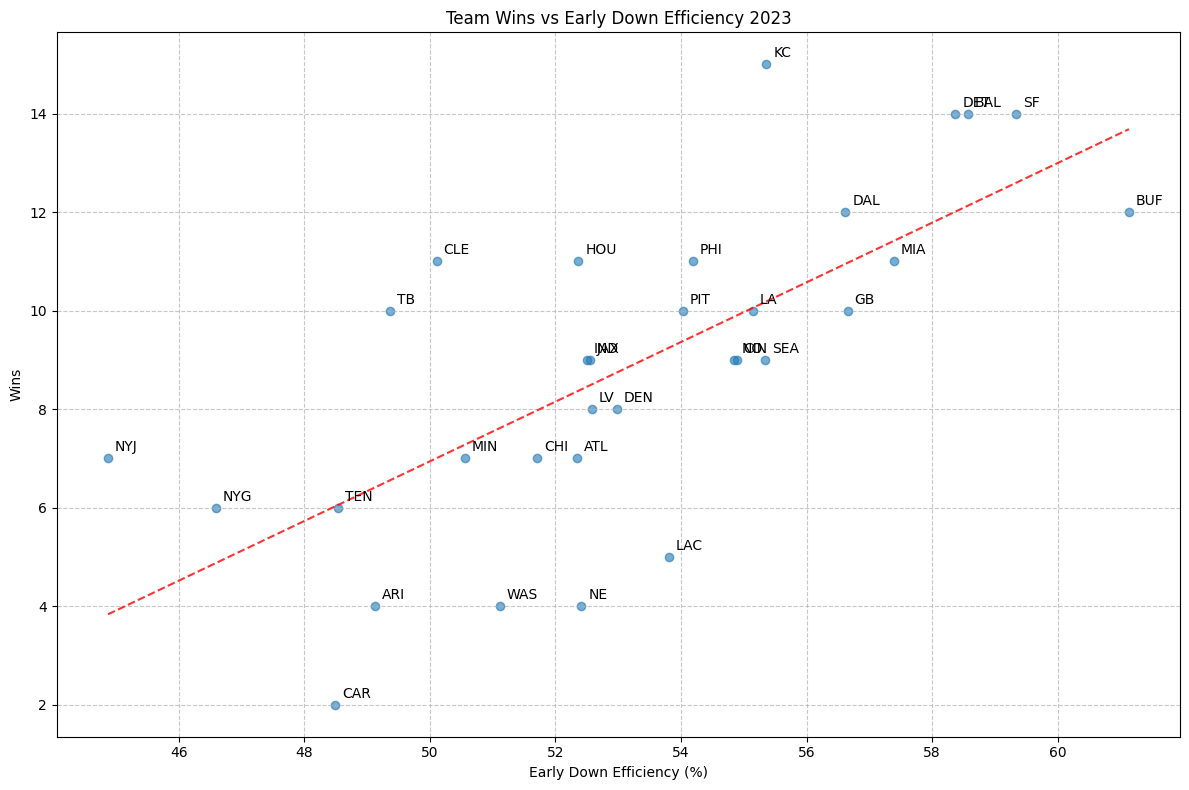

0.48875583301329967


In [21]:
# 2023 team eff

team_eff = []
team_wins = []
team_label = []

for team in teams:
    team_eff.append(team_early_down_efficiency_2023[team][2])
    team_wins.append(record_2023[team][0])
    team_label.append(team)

# Calculate correlation and trend line for chart
correlation_matrix = np.corrcoef(team_eff, team_wins)
correlation = correlation_matrix[0,1]
r_squared = correlation ** 2

slope, intercept = np.polyfit(team_eff, team_wins, 1)

plt.figure(figsize = (12, 8))
plt.scatter(team_eff, team_wins, alpha = 0.6)

for i, team in enumerate(team_label):
    plt.annotate(team, (team_eff[i], team_wins[i]), xytext=(5, 5), textcoords='offset points')

x_range = np.array([min(team_eff), max(team_eff)])
plt.plot(x_range, slope * x_range + intercept, 'r--', alpha=0.8)

plt.xlabel('Early Down Efficiency (%)')
plt.ylabel('Wins')
plt.title('Team Wins vs Early Down Efficiency 2023')

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(r_squared)

In [46]:
# Early game explosiveness -> offensive success (2024)

scores_2024 = {}
yards_2024 = {}

for team in teams:
    df = df_2024[df_2024['posteam'] == team]

    weeks = df.week.unique()
    
    for week in weeks:
        # Compare first q vs rest of game 
        quarter_one_df = df[(df.week == week) & (df.qtr == 1)]
        rest_df = df[(df.week == week) & (df.qtr != 1)]

        # Get the explosive plays of the first quarter
        explosive_plays = sum(quarter_one_df.yards_gained >= 10)

        is_home = quarter_one_df.home_team.iloc[0] == team
        score = quarter_one_df.home_score.iloc[-1] if is_home else quarter_one_df.away_score.iloc[-1]
        
        yards_gained = sum(rest_df.yards_gained)

        if score not in scores_2024:
            scores_2024[score] = []
        
        if yards_gained not in yards_2024:
            yards_2024[yards_gained] = []

        scores_2024[score].append(explosive_plays)
        yards_2024[yards_gained].append(explosive_plays)
    

In [47]:
# Early game explosiveness -> offensive success (2023)

scores_2023 = {}
yards_2023 = {}

for team in teams:
    df = df_2023[df_2023['posteam'] == team]

    weeks = df.week.unique()
    
    for week in weeks:
        # Compare first q vs rest of game 
        quarter_one_df = df[(df.week == week) & (df.qtr == 1)]
        rest_df = df[(df.week == week) & (df.qtr != 1)]

        # Get the explosive plays of the first quarter
        explosive_plays = sum(quarter_one_df.yards_gained >= 10)

        # Check if team is home or away and get score using that
        is_home = quarter_one_df.home_team.iloc[0] == team
        score = quarter_one_df.home_score.iloc[-1] if is_home else quarter_one_df.away_score.iloc[-1]
        
        # Calculate yards gained in remaining quarters
        yards_gained = sum(rest_df.yards_gained)

        if score not in scores_2023:
            scores_2023[score] = []
        
        if yards_gained not in yards_2023:
            yards_2023[yards_gained] = []

        scores_2023[score].append(explosive_plays)
        yards_2023[yards_gained].append(explosive_plays)
    

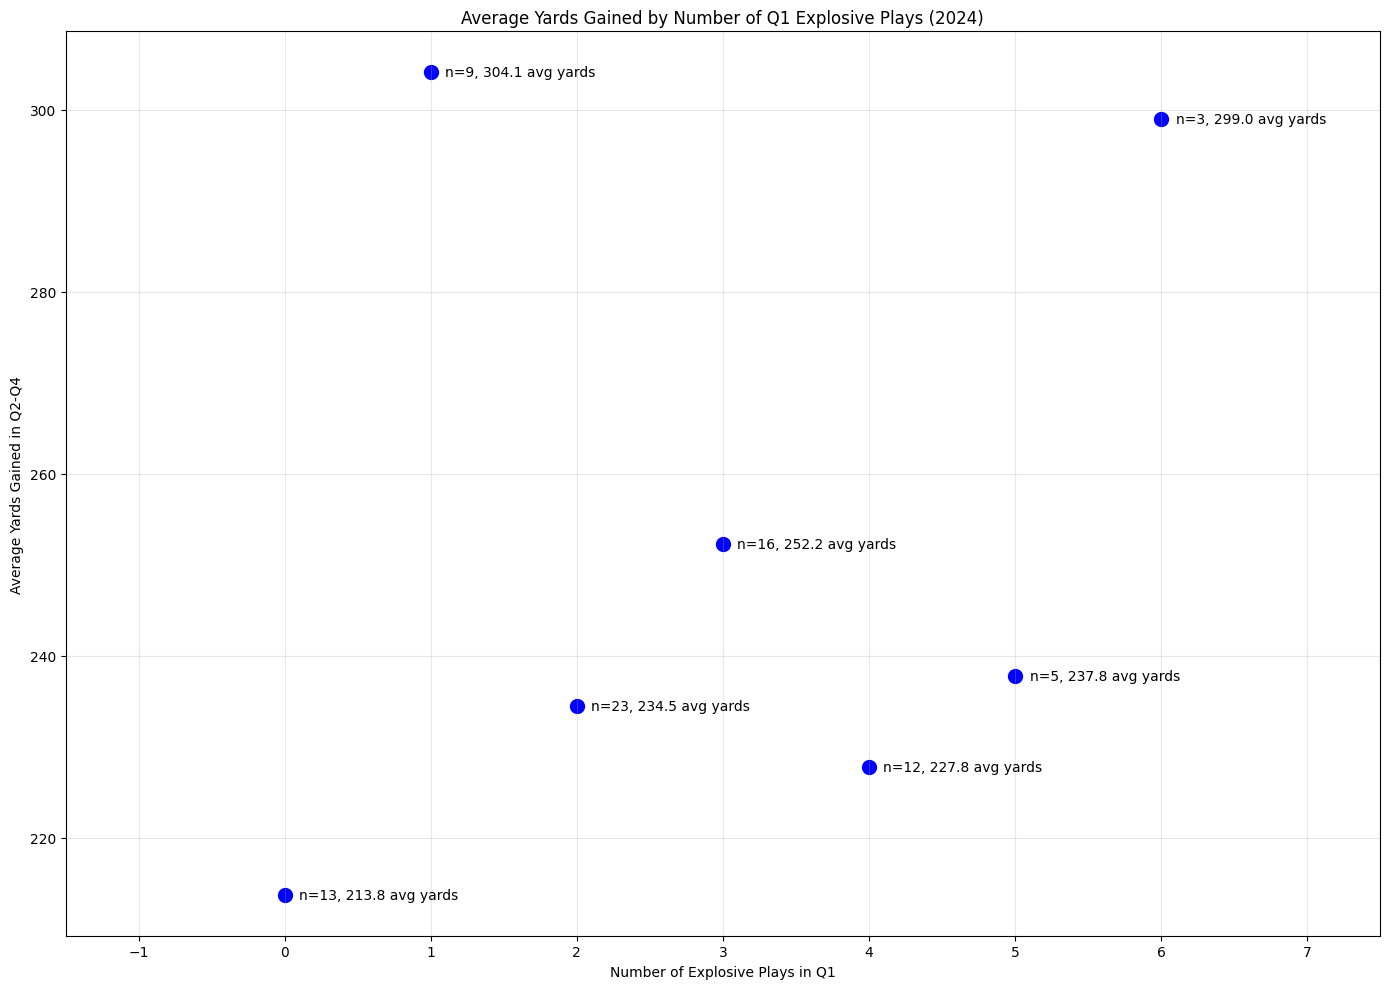

R-squared:  0.06472821630407942


In [ ]:
# Convert dictionary data to lists
explosive_plays = []
yards = []

for yards_gained, plays_list in yards_2024.items():
    for plays in plays_list:
        # Ensure clean data(Not na)
        if np.isfinite(yards_gained) and np.isfinite(plays):
            explosive_plays.append(plays)
            yards.append(yards_gained)

# Convert to numpy arrays
explosive_plays_array = np.array(explosive_plays)
yards_array = np.array(yards)

# Calculate mean yards
unique_plays = sorted(set(explosive_plays_array))
mean_yards = [np.mean(yards_array[explosive_plays_array == n]) for n in unique_plays]

correlation_matrix = np.corrcoef(unique_plays, mean_yards)
correlation = correlation_matrix[0,1]
r_squared = correlation ** 2

plt.figure(figsize=(14, 10)) 

# Plot mean values
plt.scatter(unique_plays, mean_yards, color='blue', s=100)

plt.title('Average Yards Gained by Number of Q1 Explosive Plays (2024)')
plt.xlabel('Number of Explosive Plays in Q1')
plt.ylabel('Average Yards Gained in Q2-Q4')
plt.grid(True, alpha=0.3)

# Add labels
for i, n in enumerate(unique_plays):
    count = sum(explosive_plays_array == n)
    avg = mean_yards[i]
    annotation = f'n={count}, {avg:.1f} avg yards'
    
    plt.annotate(annotation, 
                xy=(n, mean_yards[i]),
                xytext=(n + 0.1, mean_yards[i]),  # Small offset to the right
                ha='left',
                va='center')

# margins for labels
plt.margins(x=0.25)  

plt.tight_layout()
plt.show()

print("R-squared: ", r_squared)

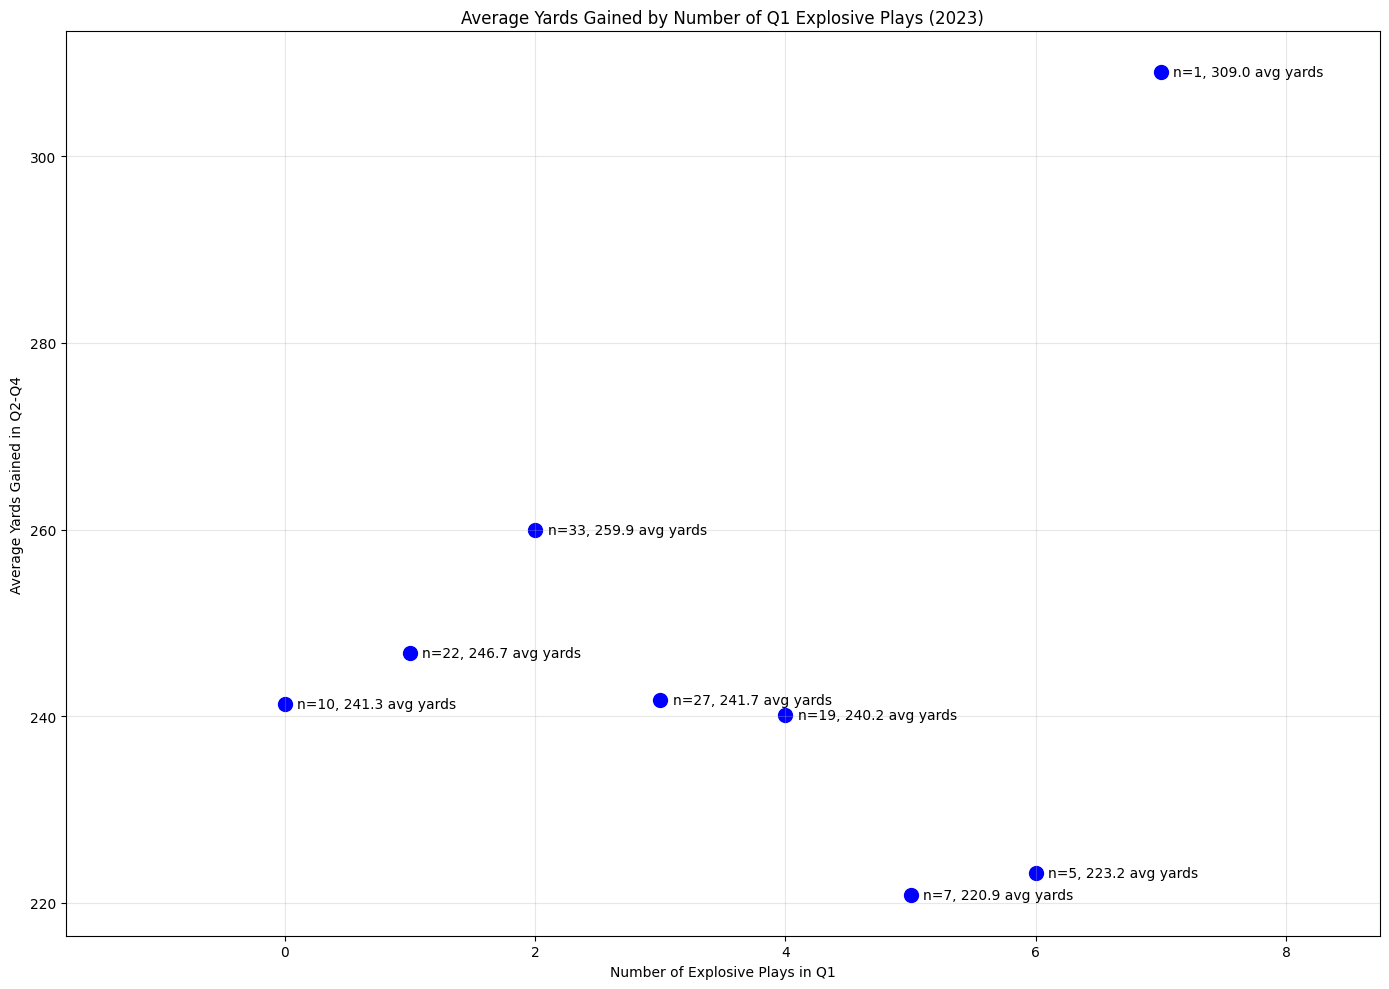

R-squared:  0.0625920109377849


In [110]:
# Convert dictionary data to lists
explosive_plays = []
yards = []

for yards_gained, plays_list in yards_2023.items():
    for plays in plays_list:
        # Ensure clean data(Not na)
        if np.isfinite(yards_gained) and np.isfinite(plays):
            explosive_plays.append(plays)
            yards.append(yards_gained)

# Convert to numpy arrays
explosive_plays_array = np.array(explosive_plays)
yards_array = np.array(yards)

# Calculate mean yards
unique_plays = sorted(set(explosive_plays_array))
mean_yards = [np.mean(yards_array[explosive_plays_array == n]) for n in unique_plays]

correlation_matrix = np.corrcoef(unique_plays, mean_yards)
correlation = correlation_matrix[0,1]
r_squared = correlation ** 2

plt.figure(figsize=(14, 10)) 

# Plot mean values
plt.scatter(unique_plays, mean_yards, color='blue', s=100)

plt.title('Average Yards Gained by Number of Q1 Explosive Plays (2023)')
plt.xlabel('Number of Explosive Plays in Q1')
plt.ylabel('Average Yards Gained in Q2-Q4')
plt.grid(True, alpha=0.3)

# Add labels
for i, n in enumerate(unique_plays):
    count = sum(explosive_plays_array == n)
    avg = mean_yards[i]
    annotation = f'n={count}, {avg:.1f} avg yards'
    
    plt.annotate(annotation, 
                xy=(n, mean_yards[i]),
                xytext=(n + 0.1, mean_yards[i]),  # Small offset to the right
                ha='left',
                va='center')

# margins for labels
plt.margins(x=0.25)  

plt.tight_layout()
plt.show()

print("R-squared: ", r_squared)

In [159]:
for col in df.columns:
    print(col)

Unnamed: 0
play_id
game_id
old_game_id
home_team
away_team
season_type
week
posteam
posteam_type
defteam
side_of_field
yardline_100
game_date
quarter_seconds_remaining
half_seconds_remaining
game_seconds_remaining
game_half
quarter_end
drive
sp
qtr
down
goal_to_go
time
yrdln
ydstogo
ydsnet
desc
play_type
yards_gained
shotgun
no_huddle
qb_dropback
qb_kneel
qb_spike
qb_scramble
pass_length
pass_location
air_yards
yards_after_catch
run_location
run_gap
field_goal_result
kick_distance
extra_point_result
two_point_conv_result
home_timeouts_remaining
away_timeouts_remaining
timeout
timeout_team
td_team
td_player_name
td_player_id
posteam_timeouts_remaining
defteam_timeouts_remaining
total_home_score
total_away_score
posteam_score
defteam_score
score_differential
posteam_score_post
defteam_score_post
score_differential_post
no_score_prob
opp_fg_prob
opp_safety_prob
opp_td_prob
fg_prob
safety_prob
td_prob
extra_point_prob
two_point_conversion_prob
ep
epa
total_home_epa
total_away_epa
total_hom

In [167]:
# Strong Drive ~ 2024
for team in teams:
    # Create copy of df
    df = df_2024[df_2024['posteam'] == team].copy() 
    
    weeks = df.week.unique()
    
    # Initialize col to 0
    df['next_drive_scored'] = 0
    
    for week in weeks:
        week_df = df[df.week == week]
        
        # Get sorted list of team's drives in this game
        team_drives = sorted(week_df.fixed_drive.unique())
        
        # Create a dictionary mapping current drive to next drive's result
        drive_map = {}
        for i in range(len(team_drives) - 1):
            
            current_drive = team_drives[i]
            next_drive = team_drives[i + 1]
            next_result = week_df[week_df['fixed_drive'] == next_drive]['drive_ended_with_score'].iloc[0]

            # drive_ended_with_score is either 0.0(no score) or 1.0
            drive_map[current_drive] = next_result
            
        # Update values
        for drive, next_score in drive_map.items():
            mask = (df['week'] == week) & (df['fixed_drive'] == drive)
            df.loc[mask, 'next_drive_scored'] = next_score

def time_to_seconds(time_str):
    if(pd.isna(time_str)):
        return 0
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

# Convert time of possession to seconds
df['possession_seconds'] = df['drive_time_of_possession'].apply(time_to_seconds)

# Create a unique drive id col for model
df['drive_unique_id'] = df['game_id'].astype(str) + '_' + df['posteam'] + '_' + df['fixed_drive'].astype(str)

In [168]:
# LOG REG model ~ 2024

# We only care about a single play from each drive, drop other plays as that will overfit
unique_drives_df = df.drop_duplicates(subset='drive_unique_id')

X = unique_drives_df[['drive_first_downs', 'possession_seconds', 'drive_play_count', 'drive_ended_with_score']].fillna(0)
y = unique_drives_df['next_drive_scored']

model = LogisticRegression()
model.fit(X, y)

odds_ratios = np.exp(model.coef_[0])

for feature, coef, odds in zip(X.columns, model.coef_[0], odds_ratios):
    print(f"\n{feature}:")
    print(f"Coefficient: {coef:.3f}")
    print(f"Odds Ratio: {odds:.3f}")



drive_first_downs:
Coefficient: 0.175
Odds Ratio: 1.191

possession_seconds:
Coefficient: 0.004
Odds Ratio: 1.004

drive_play_count:
Coefficient: -0.205
Odds Ratio: 0.814

drive_ended_with_score:
Coefficient: 0.131
Odds Ratio: 1.140


In [163]:
# Strong Drive ~ 2023
for team in teams:
    # Create copy of df
    df = df_2023[df_2023['posteam'] == team].copy() 
    
    weeks = df.week.unique()
    
    # Initialize col to 0
    df['next_drive_scored'] = 0
    
    for week in weeks:
        week_df = df[df.week == week]
        
        # Get sorted list of team's drives in this game
        team_drives = sorted(week_df.fixed_drive.unique())
        
        # Create a dictionary mapping current drive to next drive's result
        drive_map = {}
        for i in range(len(team_drives) - 1):
            
            current_drive = team_drives[i]
            next_drive = team_drives[i + 1]
            next_result = week_df[week_df['fixed_drive'] == next_drive]['drive_ended_with_score'].iloc[0]

            # drive_ended_with_score is either 0.0(no score) or 1.0
            drive_map[current_drive] = next_result
            
        # Update values
        for drive, next_score in drive_map.items():
            mask = (df['week'] == week) & (df['fixed_drive'] == drive)
            df.loc[mask, 'next_drive_scored'] = next_score

def time_to_seconds(time_str):
    if(pd.isna(time_str)):
        return 0
    minutes, seconds = map(int, time_str.split(':'))
    return minutes * 60 + seconds

# Convert time of possession to seconds
df['possession_seconds'] = df['drive_time_of_possession'].apply(time_to_seconds)

# Create a unique drive id col for model
df['drive_unique_id'] = df['game_id'].astype(str) + '_' + df['posteam'] + '_' + df['fixed_drive'].astype(str)

In [166]:
# LOG REG model ~ 2023

# We only care about a single play from each drive, drop other plays as that will overfit
unique_drives_df = df.drop_duplicates(subset='drive_unique_id')

X = unique_drives_df[['drive_first_downs', 'possession_seconds', 'drive_play_count', 'drive_ended_with_score']].fillna(0)
y = unique_drives_df['next_drive_scored']

model = LogisticRegression()
model.fit(X, y)

odds_ratios = np.exp(model.coef_[0])

for feature, coef, odds in zip(X.columns, model.coef_[0], odds_ratios):
    print(f"\n{feature}:")
    print(f"Coefficient: {coef:.3f}")
    print(f"Odds Ratio: {odds:.3f}")



drive_first_downs:
Coefficient: -0.046
Odds Ratio: 0.955

possession_seconds:
Coefficient: 0.002
Odds Ratio: 1.002

drive_play_count:
Coefficient: -0.074
Odds Ratio: 0.928

drive_ended_with_score:
Coefficient: 0.154
Odds Ratio: 1.166


In [170]:
# 4th qtr eff ~ 2024

# We only care about pass or run plays no special team plays
valid_plays = ['pass', 'run'] 

team_fourth_q_eff_2024 = {}

# Create dict structure for each team
for team in teams:
    team_fourth_q_eff_2024[team] = [0, 0] # [eff plays, tot 1,2,3 down plays]

for team in teams:
    team_df = df_2024[df_2024['posteam'] == team]

    for _, play in team_df.iterrows():
        # Check if it is a valid play 
        if play['play_type'] in valid_plays:
            # 1st down
            if play['down'] == 1:
                team_fourth_q_eff_2024[team][1] += 1
                if play['yards_gained'] >= 3:
                    team_fourth_q_eff_2024[team][0] += 1
            # 2nd down
            elif play['down'] == 2:
                team_fourth_q_eff_2024[team][1] += 1

                # Calculate 50% of the yards to gain
                togo = play['ydstogo']
                half_togo = togo/2 
                
                if play['yards_gained'] > half_togo:
                    team_fourth_q_eff_2024[team][0] += 1
            else:
                team_fourth_q_eff_2024[team][1] += 1

                if play['yards_gained'] >= play['ydstogo']:
                    team_fourth_q_eff_2024[team][0] += 1


team_fourth_q_efficiency_2024 = {}
for team in teams:
    team_fourth_q_efficiency_2024[team] = [(team_fourth_q_eff_2024[team][0]/team_fourth_q_eff_2024[team][1]) * 100] # [1st down eff, 2nd down eff, early down(1st & 2nd)]


print(team_fourth_q_efficiency_2024)


{'ARI': [56.10795454545454], 'BUF': [53.92296718972895], 'BAL': [56.9811320754717], 'KC': [57.17981888745148], 'NO': [51.417004048582996], 'CAR': [47.62589928057554], 'DAL': [48.97435897435897], 'CLE': [45.375], 'SEA': [49.457994579945805], 'DEN': [49.74554707379134], 'GB': [54.00516795865633], 'PHI': [53.26370757180157], 'IND': [47.53004005340454], 'HOU': [45.30120481927711], 'MIA': [50.65616797900262], 'JAX': [49.62852897473997], 'LA': [52.689655172413794], 'DET': [58.40386940749698], 'LAC': [47.00729927007299], 'LV': [46.433378196500676], 'NYG': [48.68421052631579], 'MIN': [54.038997214484674], 'CIN': [53.87755102040816], 'NE': [50.0], 'NYJ': [49.29775280898877], 'SF': [53.08988764044944], 'ATL': [55.302013422818796], 'PIT': [49.67741935483871], 'TEN': [47.988904299583915], 'CHI': [48.83116883116883], 'TB': [56.896551724137936], 'WAS': [56.98663426488457]}


In [172]:
# 4th qtr eff ~ 2023

# We only care about pass or run plays no special team plays
valid_plays = ['pass', 'run'] 

team_fourth_q_eff_2023 = {}

# Create dict structure for each team
for team in teams:
    team_fourth_q_eff_2023[team] = [0, 0] # [eff plays, tot 1,2,3 down plays]

for team in teams:
    team_df = df_2023[df_2023['posteam'] == team]

    for _, play in team_df.iterrows():
        # Check if it is a valid play 
        if play['play_type'] in valid_plays:
            # 1st down
            if play['down'] == 1:
                team_fourth_q_eff_2023[team][1] += 1
                if play['yards_gained'] >= 3:
                    team_fourth_q_eff_2023[team][0] += 1
            # 2nd down
            elif play['down'] == 2:
                team_fourth_q_eff_2023[team][1] += 1

                # Calculate 50% of the yards to gain
                togo = play['ydstogo']
                half_togo = togo/2 
                
                if play['yards_gained'] > half_togo:
                    team_fourth_q_eff_2023[team][0] += 1
            else:
                team_fourth_q_eff_2023[team][1] += 1

                if play['yards_gained'] >= play['ydstogo']:
                    team_fourth_q_eff_2023[team][0] += 1


team_fourth_q_efficiency_2023 = {}
for team in teams:
    team_fourth_q_efficiency_2023[team] = [(team_fourth_q_eff_2023[team][0]/team_fourth_q_eff_2023[team][1]) * 100] # [1st down eff, 2nd down eff, early down(1st & 2nd)]


print(team_fourth_q_efficiency_2023)


{'ARI': [47.52567693744164], 'BUF': [58.932902182700076], 'BAL': [55.43386689132266], 'KC': [53.17700453857791], 'NO': [51.542649727767696], 'CAR': [45.42961608775137], 'DAL': [55.48117154811716], 'CLE': [46.842525979216624], 'SEA': [51.21951219512195], 'DEN': [50.29940119760479], 'GB': [54.93079584775087], 'PHI': [53.10880829015544], 'IND': [49.03403863845446], 'HOU': [49.09871244635193], 'MIA': [54.155251141552505], 'JAX': [49.9092558983666], 'LA': [52.879581151832454], 'DET': [55.35168195718655], 'LAC': [50.36496350364964], 'LV': [49.44834503510532], 'NYG': [43.088655862726405], 'MIN': [48.35371589840075], 'CIN': [51.356589147286826], 'NE': [47.34251968503937], 'NYJ': [41.18207816968542], 'SF': [57.130872483221474], 'ATL': [49.86149584487535], 'PIT': [50.280373831775705], 'TEN': [45.63008130081301], 'CHI': [49.586776859504134], 'TB': [48.18652849740933], 'WAS': [48.20754716981132]}


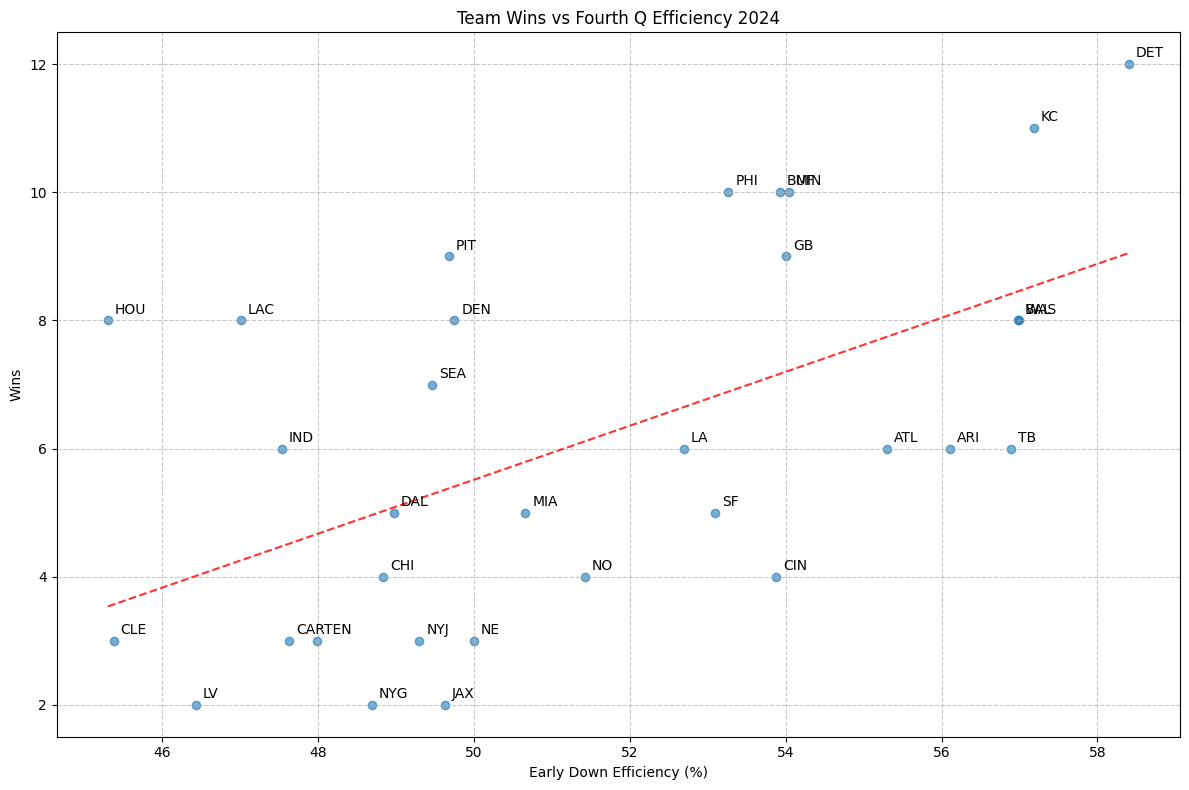

0.3085591103244011


In [171]:
# 2024 fourth q eff

team_eff = []
team_wins = []
team_label = []

for team in teams:
    team_eff.append(team_fourth_q_efficiency_2024[team][0])
    team_wins.append(record_2024[team][0])
    team_label.append(team)

# Calculate correlation and trend line for chart
correlation_matrix = np.corrcoef(team_eff, team_wins)
correlation = correlation_matrix[0,1]
r_squared = correlation ** 2

slope, intercept = np.polyfit(team_eff, team_wins, 1)

plt.figure(figsize = (12, 8))
plt.scatter(team_eff, team_wins, alpha = 0.6)

for i, team in enumerate(team_label):
    plt.annotate(team, (team_eff[i], team_wins[i]), xytext=(5, 5), textcoords='offset points')

x_range = np.array([min(team_eff), max(team_eff)])
plt.plot(x_range, slope * x_range + intercept, 'r--', alpha=0.8)

plt.xlabel('Early Down Efficiency (%)')
plt.ylabel('Wins')
plt.title('Team Wins vs Fourth Q Efficiency 2024')

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(r_squared)

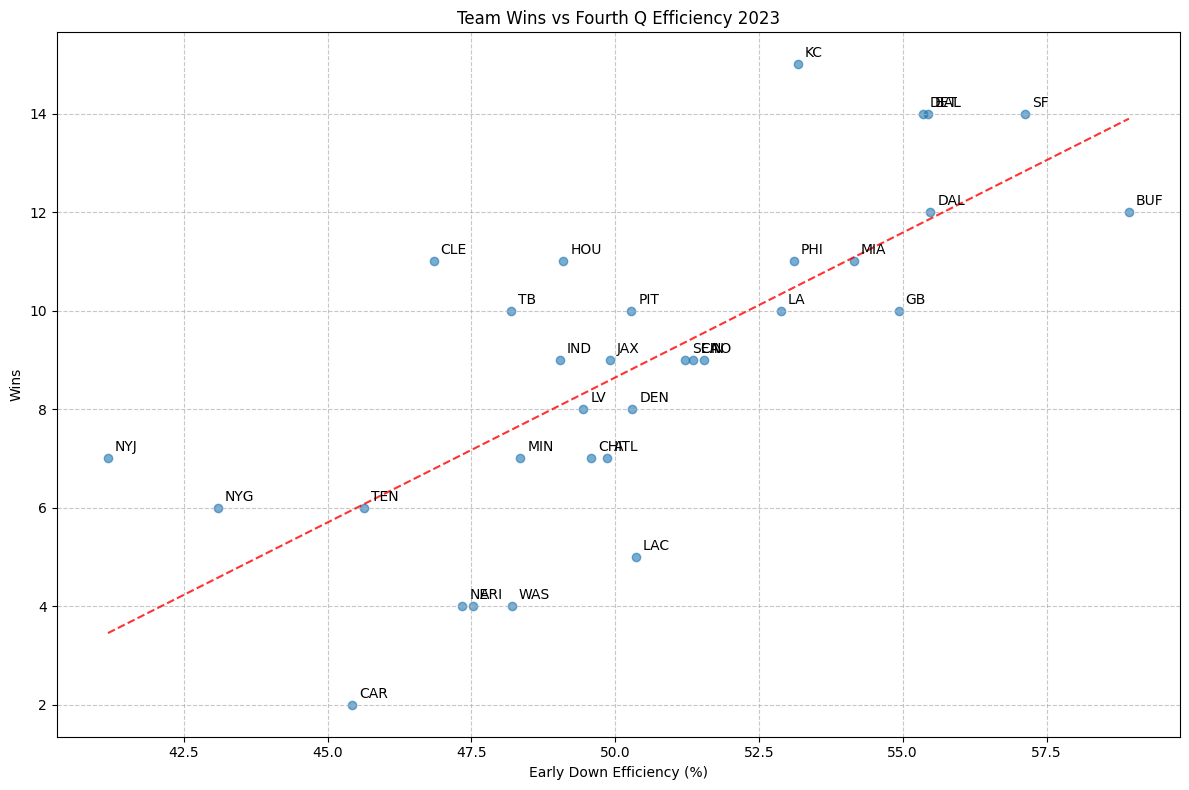

0.520368493667874


In [173]:
# 2023 fourth q eff

team_eff = []
team_wins = []
team_label = []

for team in teams:
    team_eff.append(team_fourth_q_efficiency_2023[team][0])
    team_wins.append(record_2023[team][0])
    team_label.append(team)

# Calculate correlation and trend line for chart
correlation_matrix = np.corrcoef(team_eff, team_wins)
correlation = correlation_matrix[0,1]
r_squared = correlation ** 2

slope, intercept = np.polyfit(team_eff, team_wins, 1)

plt.figure(figsize = (12, 8))
plt.scatter(team_eff, team_wins, alpha = 0.6)

for i, team in enumerate(team_label):
    plt.annotate(team, (team_eff[i], team_wins[i]), xytext=(5, 5), textcoords='offset points')

x_range = np.array([min(team_eff), max(team_eff)])
plt.plot(x_range, slope * x_range + intercept, 'r--', alpha=0.8)

plt.xlabel('Early Down Efficiency (%)')
plt.ylabel('Wins')
plt.title('Team Wins vs Fourth Q Efficiency 2023')

plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(r_squared)

In [211]:
# Script plays ~ 2024

df_new_2024 = df_2024.copy()
df_new_2024['game_play_num'] = -1

# iterate through games
for game_id in df_new_2024.game_id.unique():
    game_df = df_new_2024[df_new_2024['game_id'] == game_id]
    
    # Get teams in game
    first_play = game_df.iloc[1]
    teams = [first_play['home_team'], first_play['away_team']]
    
    # Initialize play counters for both teams
    play_counts = {teams[0]: 0, teams[1]: 0}
    
    # Update play numbers for each valid play
    for idx, play in game_df.iterrows():
        if play['posteam'] in teams and str(play['play_type']) in valid_plays:
            current_count = play_counts[play['posteam']]
            df_new_2024.loc[idx, 'game_play_num'] = current_count
            play_counts[play['posteam']] += 1

In [212]:
# teams is reset above reset teams

teams = df_2024['posteam'].dropna().unique()

In [213]:
# script vs non script ~ 2024
team_plays_2024 = {}

for team in teams:
    team_games = df_new_2024[df_new_2024['posteam'] == team]['game_id'].unique()
    # [script plays, script eff plays, script avg yards, non script plays, non script eff, non script avg yards]
    team_plays_2024[team] = [0, 0, 0, 0, 0, 0]
    for game in team_games:
        game_df = df_new_2024[df_new_2024['game_id'] == game]

        for _, play in game_df.iterrows():
            play_num = play['game_play_num']
            # Scripted
            if play_num > -1 and play_num < 16:
                team_plays_2024[team][0] += 1
                if play.down == 1 and play.yards_gained >= 3:
                    # eff 1st
                    team_plays_2024[team][1] += 1
                elif play.down == 2:
                    togo = play['ydstogo']
                    half_togo = togo/2 
                    if play.yards_gained >= half_togo:
                        # eff 2nd
                        team_plays_2024[team][1] += 1
                else:
                    if play.yards_gained >= play.ydstogo:
                        team_plays_2024[team][1] += 1
                # Add yards gained
                if not pd.isna(play.yards_gained):
                    team_plays_2024[team][2] += play.yards_gained
            elif play_num != -1:
                team_plays_2024[team][3] += 1

                if play.down == 1 and play.yards_gained >= 3:
                    # eff 1st
                    team_plays_2024[team][4] += 1
                elif play.down == 2:
                    togo = play['ydstogo']
                    half_togo = togo/2 
                    if play.yards_gained >= half_togo:
                        # eff 2nd
                        team_plays_2024[team][4] += 1
                else:
                    if play.yards_gained >= play.ydstogo:
                        team_plays_2024[team][4] += 1
                # Add yards gained
                if not pd.isna(play.yards_gained):
                    team_plays_2024[team][5] += play.yards_gained
                
# Convert to eff & med

for team in teams:
    team_plays_2024[team][1] = (team_plays_2024[team][1]/team_plays_2024[team][0]) * 100
    team_plays_2024[team][2] = team_plays_2024[team][2]/team_plays_2024[team][0]

    team_plays_2024[team][4] = (team_plays_2024[team][4]/team_plays_2024[team][3]) * 100
    team_plays_2024[team][5] = team_plays_2024[team][5]/team_plays_2024[team][3]
    
print(team_plays_2024)

{'ARI': [384, 59.375, 5.947916666666667, 1054, 55.40796963946869, 5.622390891840607], 'BUF': [384, 59.375, 6.236979166666667, 1030, 51.067961165048544, 5.493203883495146], 'BAL': [416, 56.25, 6.134615384615385, 1211, 55.40875309661437, 6.179190751445087], 'KC': [384, 53.90625, 5.552083333333333, 1090, 55.5045871559633, 5.267889908256881], 'NO': [384, 56.510416666666664, 5.979166666666667, 1111, 52.74527452745274, 5.853285328532853], 'CAR': [384, 58.854166666666664, 5.583333333333333, 1111, 54.18541854185418, 5.493249324932493], 'DAL': [384, 56.510416666666664, 6.356770833333333, 1129, 51.6386182462356, 5.117803365810452], 'CLE': [384, 48.69791666666667, 4.994791666666667, 1118, 46.95885509838998, 5.437388193202147], 'SEA': [384, 54.427083333333336, 5.346354166666667, 1103, 52.94650951949229, 5.521305530371714], 'DEN': [416, 50.96153846153846, 5.0048076923076925, 1206, 47.8441127694859, 5.15257048092869], 'GB': [416, 54.08653846153846, 5.5625, 1153, 55.767562879444924, 5.960971379011275

In [214]:
# Script plays ~ 2023

df_new_2023 = df_2023.copy()
df_new_2023['game_play_num'] = -1

# iterate through games
for game_id in df_new_2023.game_id.unique():
    game_df = df_new_2023[df_new_2023['game_id'] == game_id]
    
    # Get teams in game
    first_play = game_df.iloc[1]
    teams = [first_play['home_team'], first_play['away_team']]
    
    # Initialize play counters for both teams
    play_counts = {teams[0]: 0, teams[1]: 0}
    
    # Update play numbers for each valid play
    for idx, play in game_df.iterrows():
        if play['posteam'] in teams and str(play['play_type']) in valid_plays:
            current_count = play_counts[play['posteam']]
            df_new_2023.loc[idx, 'game_play_num'] = current_count
            play_counts[play['posteam']] += 1

In [215]:
# teams is reset above reset teams

teams = df_2023['posteam'].dropna().unique()

In [216]:
# Script vs non script 2023
team_plays_2023 = {}

for team in teams:
    team_games = df_new_2023[df_new_2023['posteam'] == team]['game_id'].unique()
    # [script plays, script eff plays, script avg yards, non script plays, non script eff, non script avg yards]
    team_plays_2023[team] = [0, 0, 0, 0, 0, 0]
    for game in team_games:
        game_df = df_new_2023[df_new_2023['game_id'] == game]

        for _, play in game_df.iterrows():
            play_num = play['game_play_num']
            # Scripted
            if play_num > -1 and play_num < 16:
                team_plays_2023[team][0] += 1
                if play.down == 1 and play.yards_gained >= 3:
                    # eff 1st
                    team_plays_2023[team][1] += 1
                elif play.down == 2:
                    togo = play['ydstogo']
                    half_togo = togo/2 
                    if play.yards_gained >= half_togo:
                        # eff 2nd
                        team_plays_2023[team][1] += 1
                else:
                    if play.yards_gained >= play.ydstogo:
                        team_plays_2023[team][1] += 1
                # Add yards gained
                if not pd.isna(play.yards_gained):
                    team_plays_2023[team][2] += play.yards_gained
            elif play_num != -1:
                team_plays_2023[team][3] += 1

                if play.down == 1 and play.yards_gained >= 3:
                    # eff 1st
                    team_plays_2023[team][4] += 1
                elif play.down == 2:
                    togo = play['ydstogo']
                    half_togo = togo/2 
                    if play.yards_gained >= half_togo:
                        # eff 2nd
                        team_plays_2023[team][4] += 1
                else:
                    if play.yards_gained >= play.ydstogo:
                        team_plays_2023[team][4] += 1
                # Add yards gained
                if not pd.isna(play.yards_gained):
                    team_plays_2023[team][5] += play.yards_gained
                
# Convert to eff & med

for team in teams:
    team_plays_2023[team][1] = (team_plays_2023[team][1]/team_plays_2023[team][0]) * 100
    team_plays_2023[team][2] = team_plays_2023[team][2]/team_plays_2023[team][0]

    team_plays_2023[team][4] = (team_plays_2023[team][4]/team_plays_2023[team][3]) * 100
    team_plays_2023[team][5] = team_plays_2023[team][5]/team_plays_2023[team][3]
    
print(team_plays_2023)

{'WAS': [544, 53.49264705882353, 5.610294117647059, 1625, 52.676923076923075, 5.479384615384616], 'ARI': [544, 53.125, 5.476102941176471, 1574, 53.1130876747141, 5.466963151207116], 'BUF': [608, 52.63157894736842, 5.453947368421052, 1741, 57.03618609994257, 5.595060310166571], 'NYJ': [544, 41.911764705882355, 4.625, 1578, 46.32446134347275, 4.465145754119138], 'ATL': [544, 49.44852941176471, 5.4650735294117645, 1611, 50.0310366232154, 5.093109869646183], 'CAR': [544, 53.30882352941176, 4.788602941176471, 1531, 48.39973873285434, 4.542782495101241], 'CIN': [544, 59.55882352941176, 5.9025735294117645, 1537, 51.59401431359791, 5.603122966818478], 'CLE': [576, 46.70138888888889, 5.675347222222222, 1707, 44.81546572934973, 4.5436438195664905], 'NYG': [544, 49.44852941176471, 5.180147058823529, 1587, 49.52741020793951, 5.111531190926276], 'DAL': [576, 55.55555555555556, 5.789930555555555, 1675, 54.92537313432836, 5.401791044776119], 'DET': [640, 55.3125, 5.8453125, 1879, 55.29536987759447, 5

In [ ]:
# t-stat script vs non script efficiency  ~ 2024
scripted_values = []
nonscripted_values = []

for team in teams:
    scripted_eff = team_plays_2024[team][1]   
    nonscripted_eff = team_plays_2024[team][4] 
    
    scripted_values.append(scripted_eff)
    nonscripted_values.append(nonscripted_eff)

# Perform single t-test for all teams combined
t_stat, p_value = stats.ttest_rel(scripted_values, nonscripted_values)

print(f"Overall t-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.6f}")

Overall t-statistic: 4.323
P-value: 0.000148


In [219]:
# t-stat script vs non script efficiency  ~ 2024
scripted_values = []
nonscripted_values = []

for team in teams:
    scripted_avg = team_plays_2024[team][2]    # scripted efficiency
    nonscripted_avg = team_plays_2024[team][5]  # non-scripted efficiency
    
    scripted_values.append(scripted_avg)
    nonscripted_values.append(nonscripted_avg)

# Perform single t-test for all teams combined
t_stat, p_value = stats.ttest_rel(scripted_values, nonscripted_values)

print(f"Overall t-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.6f}")

Overall t-statistic: 0.887
P-value: 0.381698


In [ ]:
# t-stat script vs non script eff ~ 2023
scripted_values = []
nonscripted_values = []

for team in teams:
    scripted_eff = team_plays_2023[team][1]    
    nonscripted_eff = team_plays_2023[team][4]  
    
    scripted_values.append(scripted_eff)
    nonscripted_values.append(nonscripted_eff)

# Perform single t-test for all teams combined
t_stat, p_value = stats.ttest_rel(scripted_values, nonscripted_values)

print(f"Overall t-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.6f}")

Overall t-statistic: 4.033
P-value: 0.000333


In [220]:
# t-stat script vs non script yards gained  ~ 2023
scripted_values = []
nonscripted_values = []

for team in teams:
    scripted_avg = team_plays_2023[team][2]    # scripted efficiency
    nonscripted_avg = team_plays_2023[team][5]  # non-scripted efficiency
    
    scripted_values.append(scripted_avg)
    nonscripted_values.append(nonscripted_avg)

# Perform single t-test for all teams combined
t_stat, p_value = stats.ttest_rel(scripted_values, nonscripted_values)

print(f"Overall t-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.6f}")

Overall t-statistic: 1.739
P-value: 0.092003
